In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
# import warnings
# warnings.filterwarnings(action='ignore')

# Penguin

## Loading Data, Info, Describe

In [3]:
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
print(df["species"].unique())
print(df["island"].unique())
print(df["sex"].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['Male' 'Female' nan]


In [7]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [8]:
df["island"].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [9]:
df["island"].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

## Masking, Statistics

In [10]:
# get avg of male penguin's body weight
mask = df["sex"] == "Male"
df.loc[mask, "body_mass_g"].mean()

np.float64(4545.684523809524)

In [11]:
# get avg of female penguins' who live in Dream island body weight
mask1 = df["sex"] == "Female"
mask2 = df["island"] == "Dream"
df.loc[mask1 & mask2, "body_mass_g"].mean()

np.float64(3446.311475409836)

### Using group by

In [12]:
# must put category + what you want to see
df[["body_mass_g", "island"]].groupby("island").mean().round(2)

,body_mass_g
island,
Biscoe,4716.02
Dream,3712.90
Torgersen,3706.37


In [13]:
df[["flipper_length_mm", "species"]].groupby("species").max()

,flipper_length_mm
species,
Adelie,210.0
Chinstrap,212.0
Gentoo,231.0


In [14]:
gb = df[["flipper_length_mm", "species", "sex"]].groupby(["species", "sex"])
gb.mean()

flipper_length_mm
species   sex                      
Adelie    Female         187.794521
          Male           192.410959
Chinstrap Female         191.735294
          Male           199.911765
Gentoo    Female         212.706897
          Male           221.540984

In [15]:
gb = df[["flipper_length_mm", "species", "sex"]].groupby(["species", "sex"])
gb.mean().unstack()

flipper_length_mm            
sex                  Female        Male
species                                
Adelie           187.794521  192.410959
Chinstrap        191.735294  199.911765
Gentoo           212.706897  221.540984

## Plotting

<Axes: xlabel='island'>

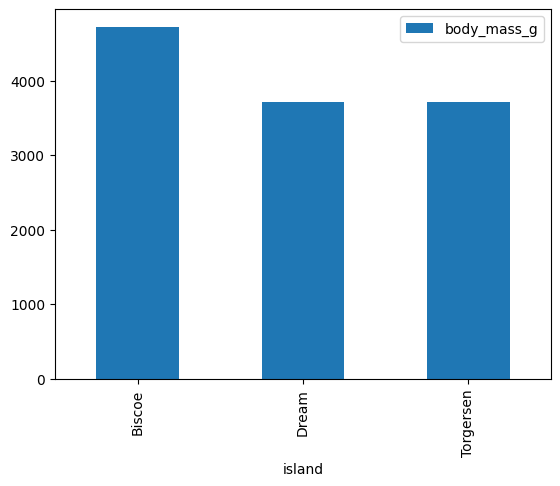

In [16]:
gb = df[["body_mass_g", "island"]].groupby("island").mean() 
gb.plot(kind="bar")

array([<Axes: ylabel='body_mass_g'>], dtype=object)

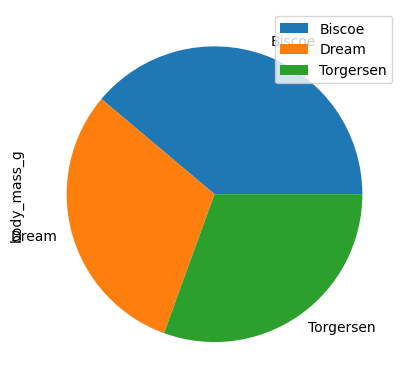

In [17]:
gb = df[["body_mass_g", "island"]].groupby("island").mean()
gb.plot(kind="pie", subplots=True)

<Axes: >

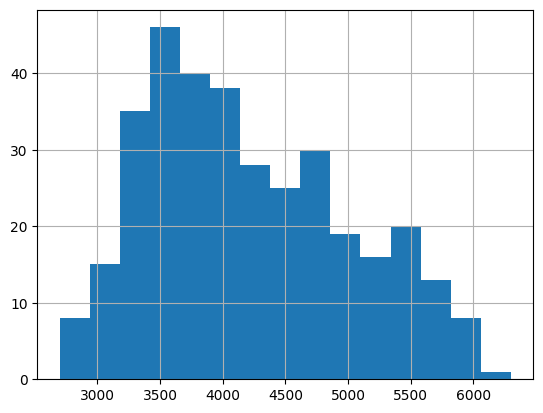

In [18]:
df["body_mass_g"].hist(bins=15)

<Axes: >

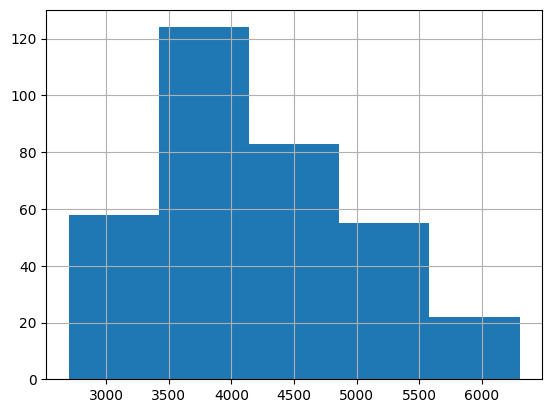

In [19]:
df["body_mass_g"].hist(bins=5)

## Plotting using seaborn module

<Axes: xlabel='body_mass_g', ylabel='Count'>

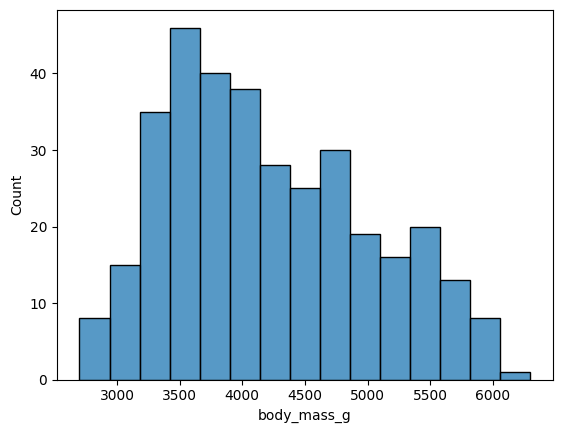

In [20]:
sns.histplot(df["body_mass_g"], bins=15)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

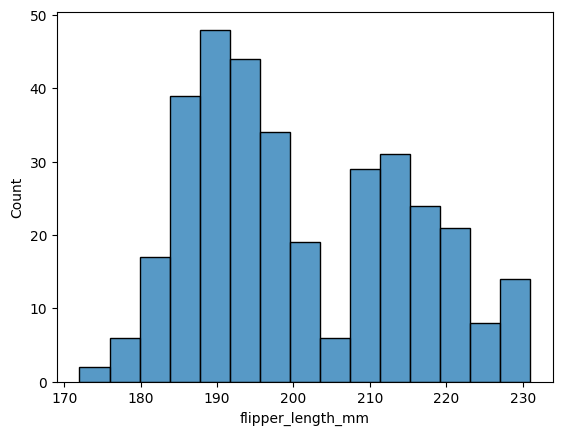

In [21]:
sns.histplot(df["flipper_length_mm"], bins=15)

<Axes: xlabel='body_mass_g', ylabel='Count'>

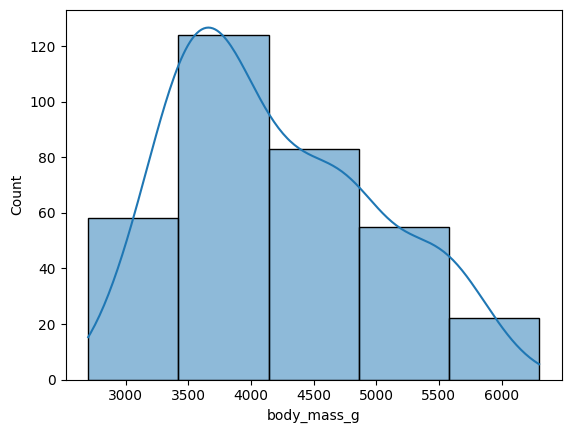

In [22]:
sns.histplot(df["body_mass_g"],kde=True, bins=5)

<Axes: xlabel='island', ylabel='count'>

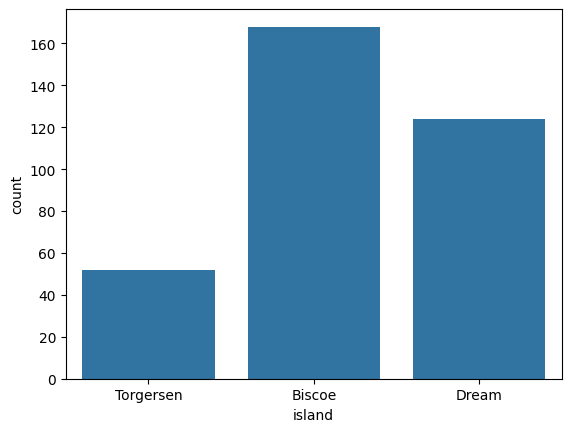

In [23]:
sns.countplot(x="island", data=df)

<Axes: xlabel='island', ylabel='count'>

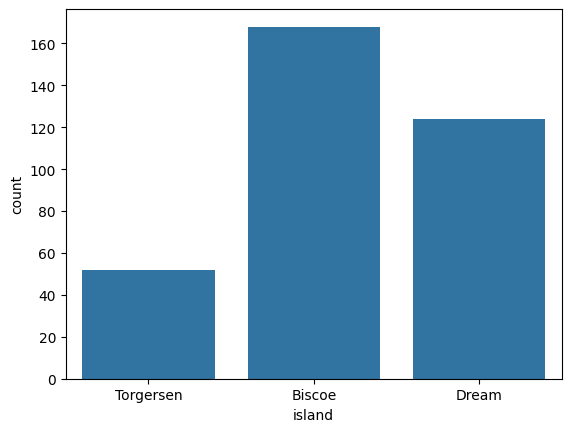

In [24]:
sns.countplot(x="island", data=df)

<Axes: xlabel='island', ylabel='flipper_length_mm'>

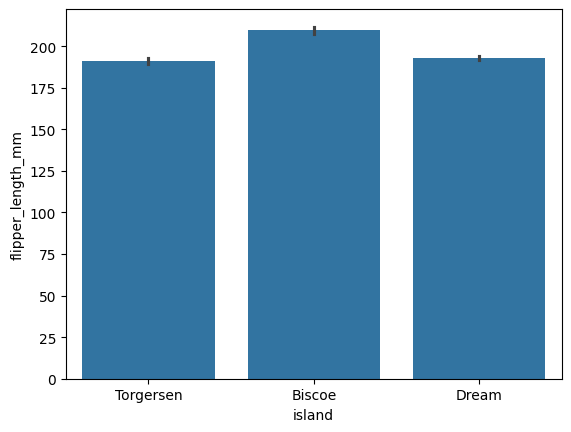

In [25]:
sns.barplot(x="island", y="flipper_length_mm", data=df)

<Axes: xlabel='sex', ylabel='flipper_length_mm'>

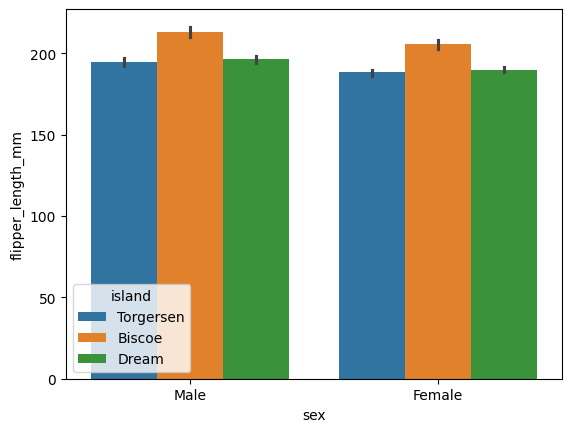

In [26]:
sns.barplot(x="sex", y="flipper_length_mm", data=df, hue="island")

<Axes: xlabel='island', ylabel='body_mass_g'>

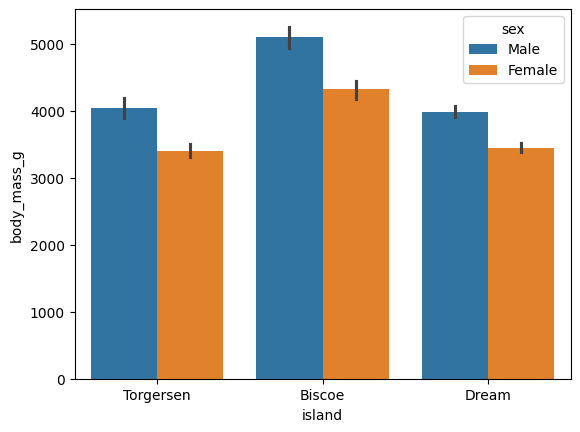

In [27]:
sns.barplot(x="island", y="body_mass_g", data=df, hue="sex")

<Axes: xlabel='island', ylabel='count'>

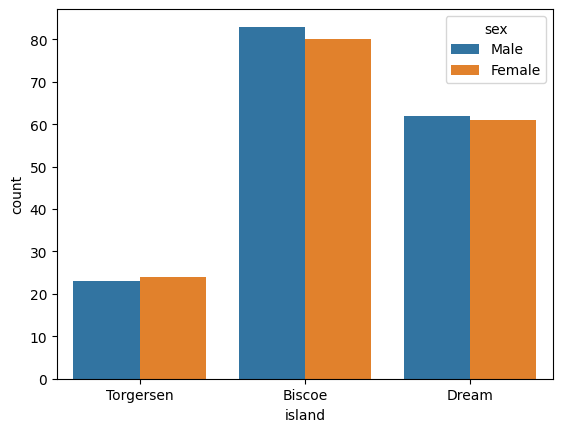

In [28]:
sns.countplot(x="island", data=df, hue="sex")

<Axes: xlabel='sex', ylabel='bill_length_mm'>

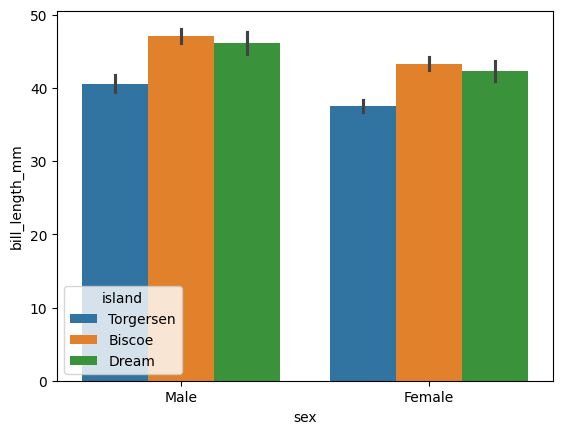

In [29]:
sns.barplot(x="sex", y="bill_length_mm", data=df, hue="island")

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

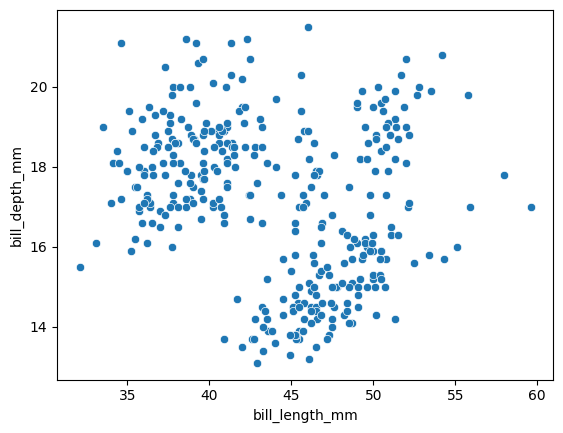

In [30]:
sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", data=df)

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

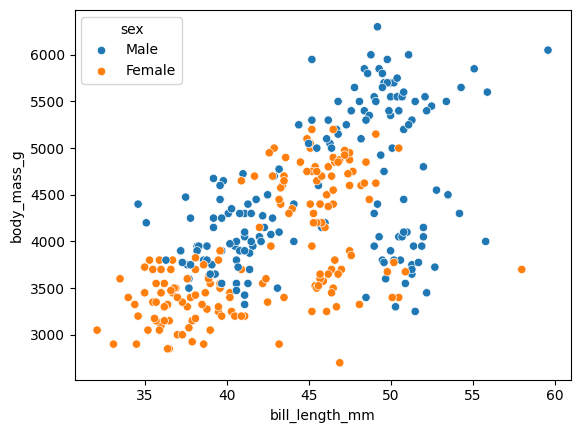

In [31]:
sns.scatterplot(x="bill_length_mm", y="body_mass_g", data=df, hue="sex")

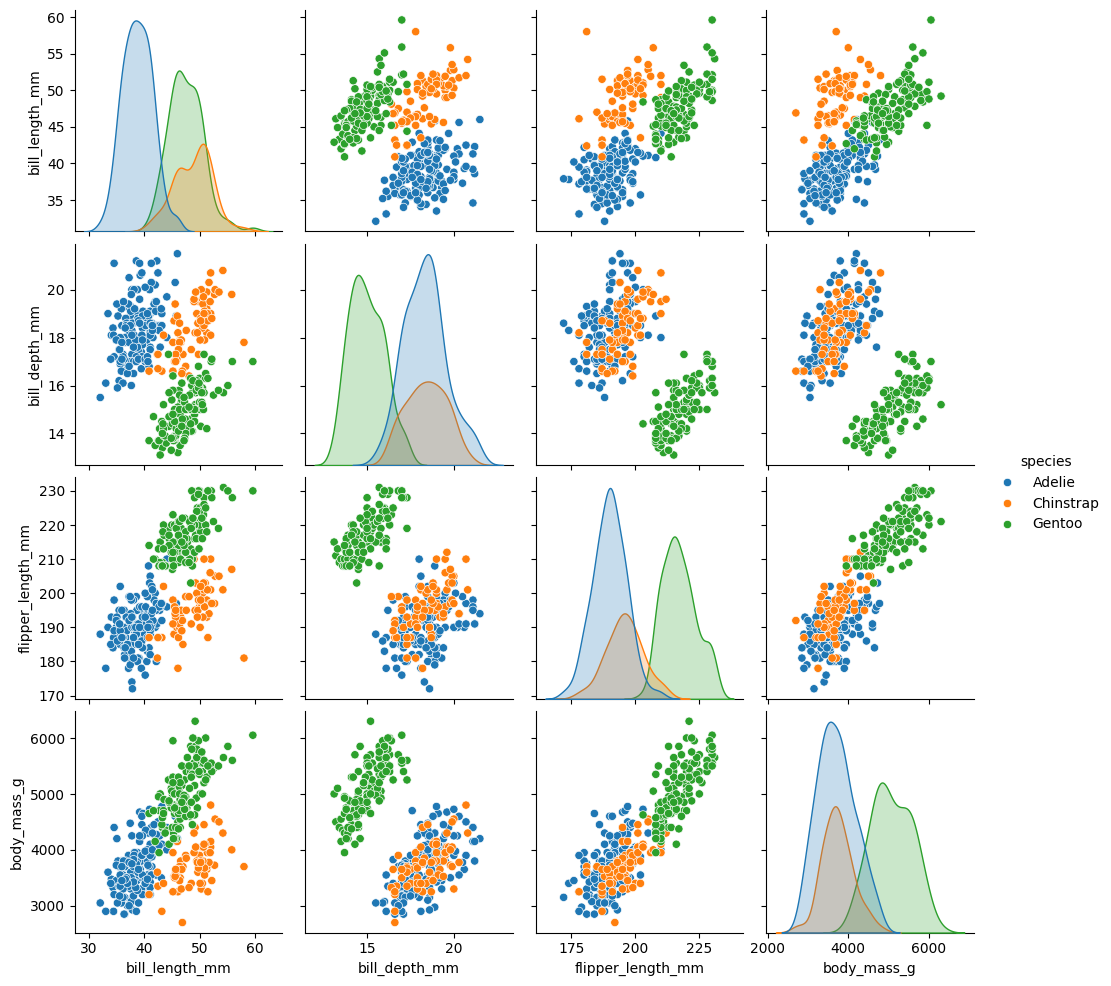

In [32]:
sns.pairplot(df, hue="species")

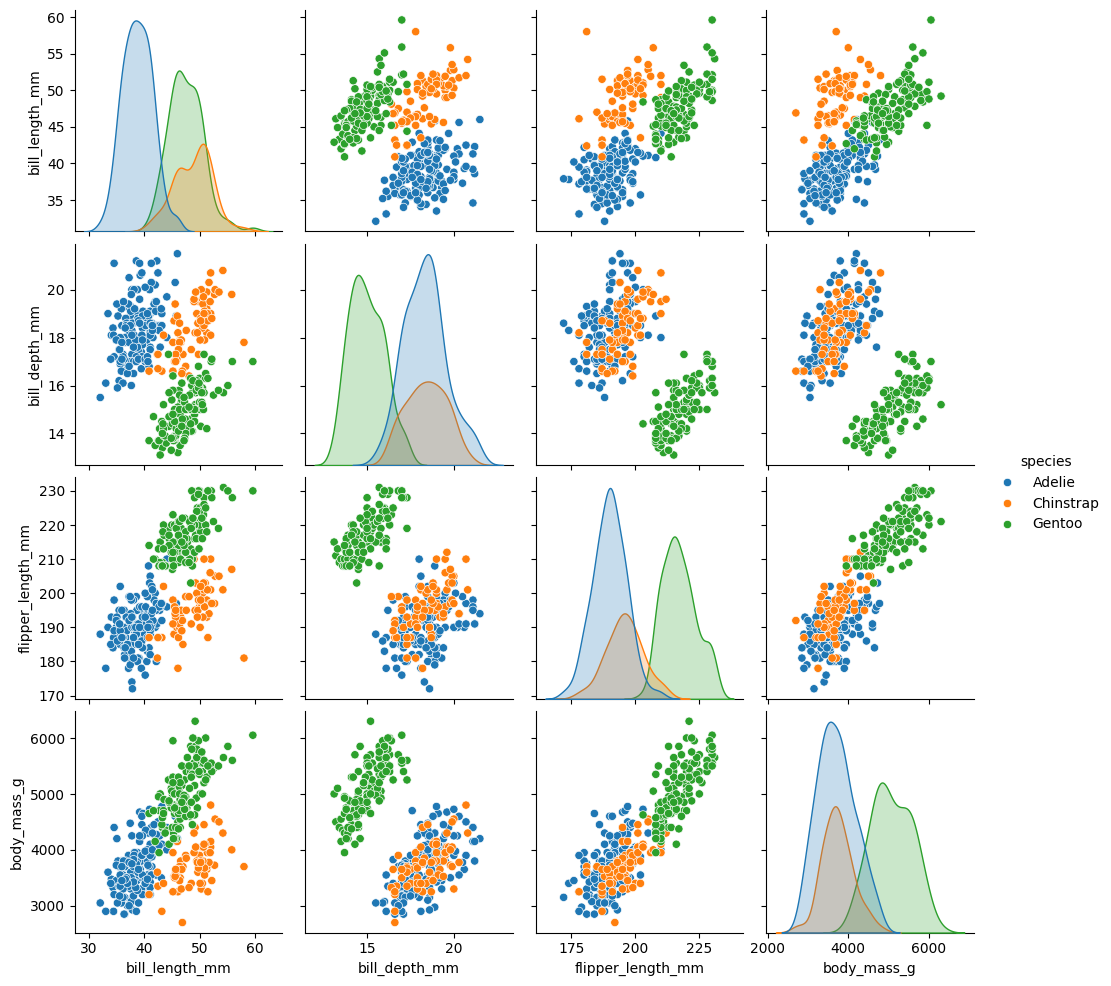

In [33]:
sns.pairplot(df, hue="species")

<Axes: xlabel='species', ylabel='body_mass_g'>

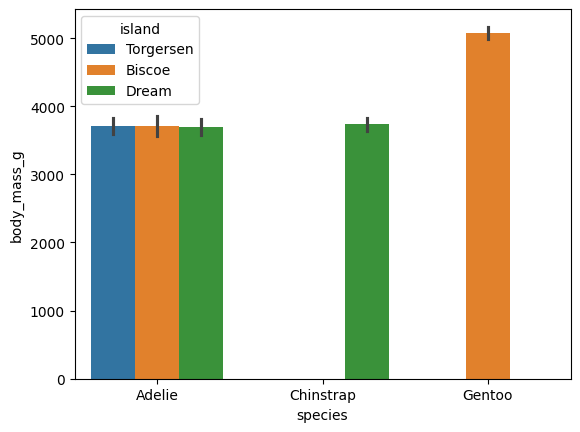

In [34]:
sns.barplot(x="species", y="body_mass_g", data=df, hue="island")

# Iris

In [35]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [36]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [39]:
print(iris.loc[iris["species"] == "setosa", "petal_length"].mean())
print(iris.loc[iris["species"] == "virginica", "petal_length"].mean())
print(iris.loc[iris["species"] == "versicolor", "petal_length"].mean())
# but we can use more convinient way... see below

1.4620000000000002
5.5520000000000005
4.26


In [40]:
iris[["petal_length", "species"]].groupby("species").mean()

,petal_length
species,
setosa,1.462
versicolor,4.260
virginica,5.552


In [41]:
iris[["petal_width", "petal_length", "species"]].groupby("species").mean()

,petal_width,petal_length
species,,
setosa,0.246,1.462
versicolor,1.326,4.260
virginica,2.026,5.552


<Axes: xlabel='species', ylabel='petal_width'>

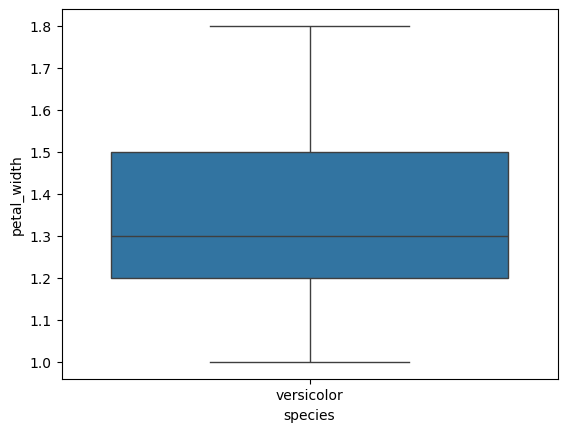

In [42]:
sns.boxplot(x="species", y="petal_width", data=iris[iris["species"]=="versicolor"])

<Axes: xlabel='species', ylabel='petal_width'>

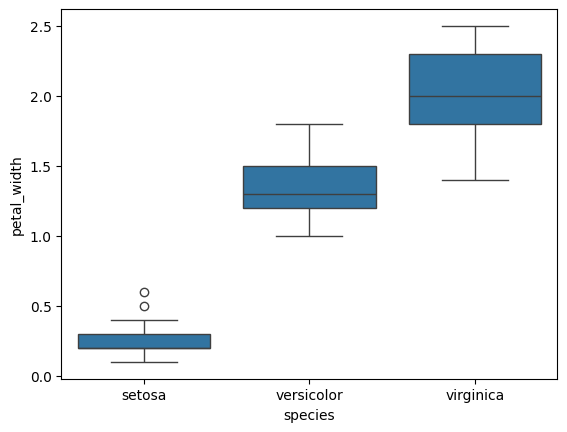

In [43]:
sns.boxplot(x="species", y="petal_width", data=iris)

<Axes: xlabel='species', ylabel='petal_width'>

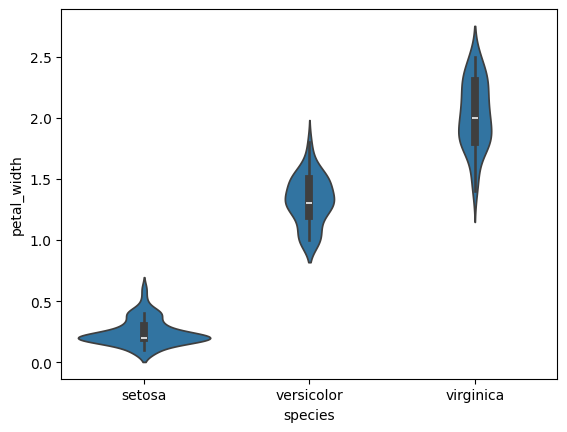

In [44]:
sns.violinplot(x="species", y="petal_width", data=iris)

<Axes: xlabel='species', ylabel='petal_width'>

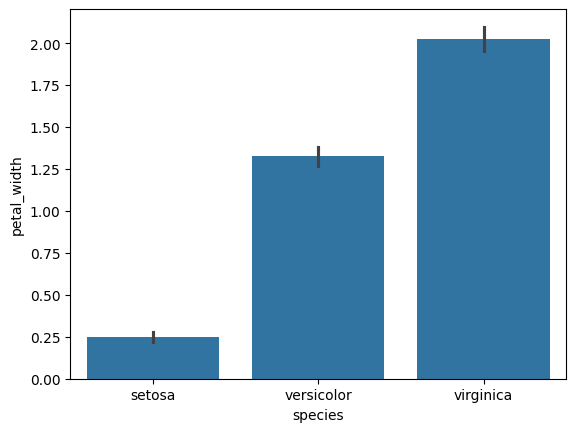

In [45]:
sns.barplot(x="species", y="petal_width", data=iris)

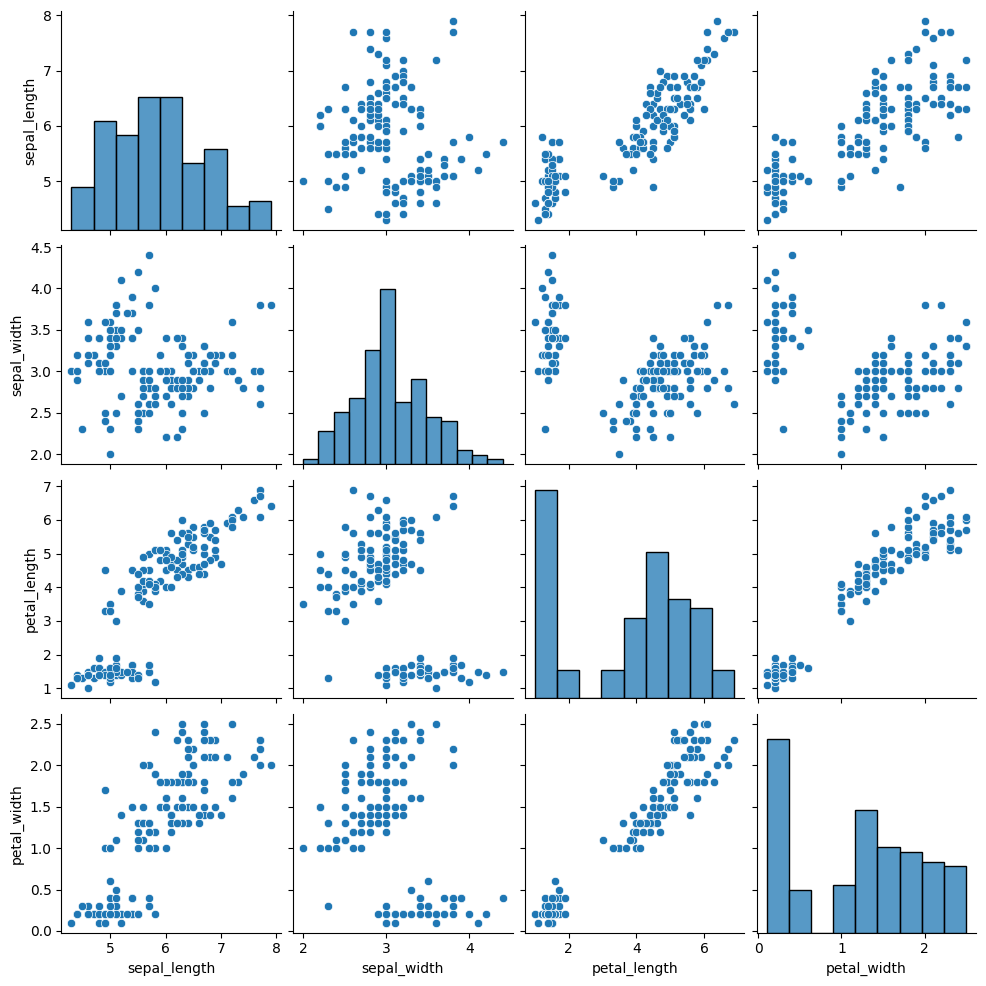

In [46]:
sns.pairplot(iris)

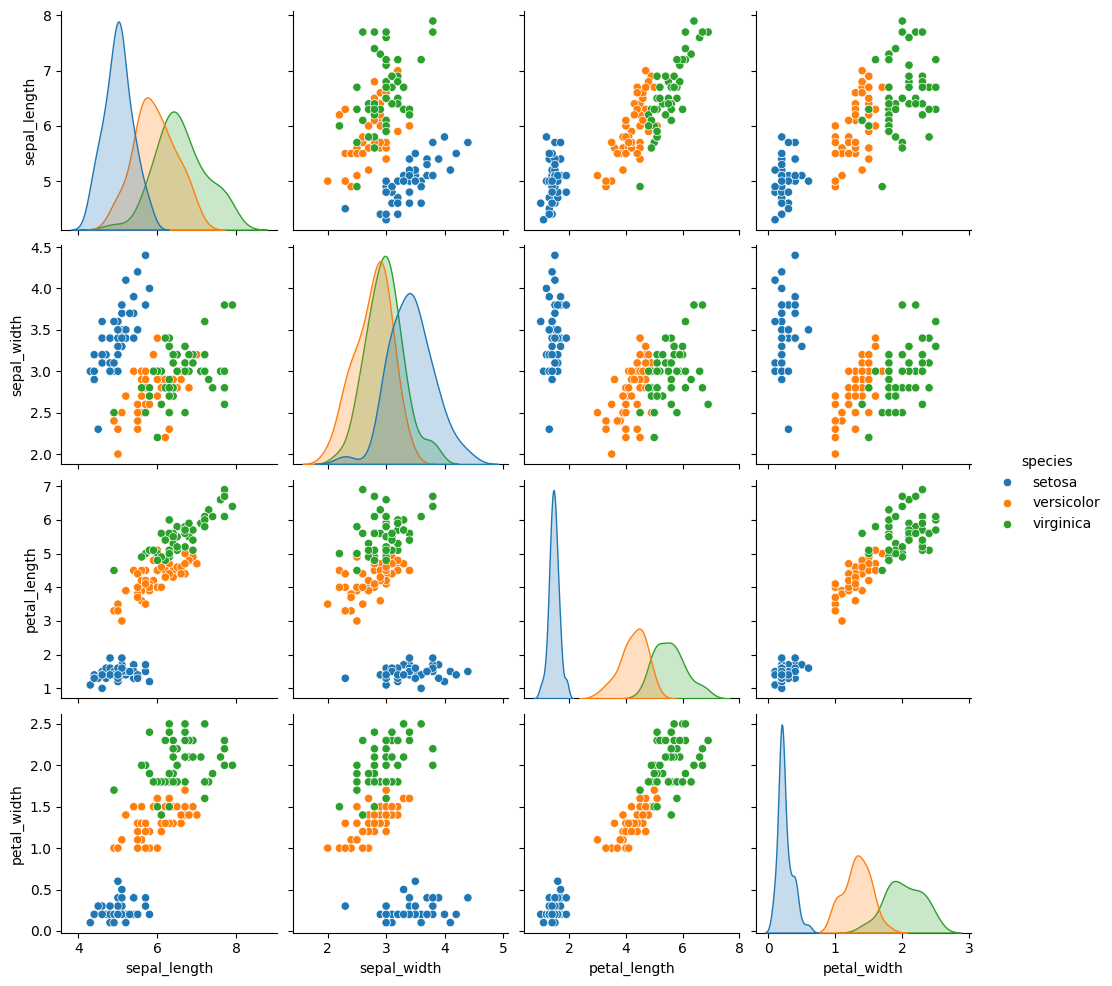

In [47]:
sns.pairplot(iris, hue="species")

<Axes: xlabel='petal_length', ylabel='petal_width'>

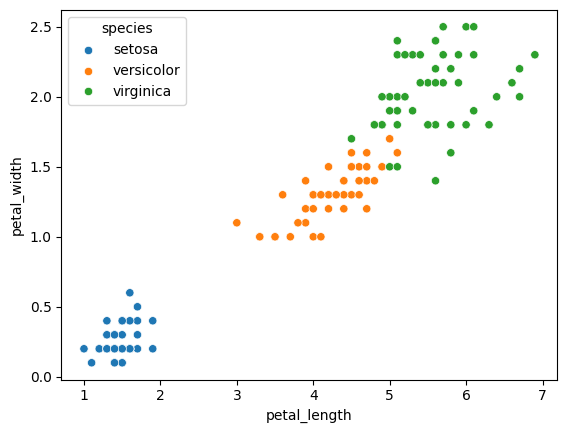

In [48]:
sns.scatterplot(x="petal_length", y="petal_width", data=iris, hue="species")

<Axes: xlabel='sepal_length', ylabel='petal_width'>

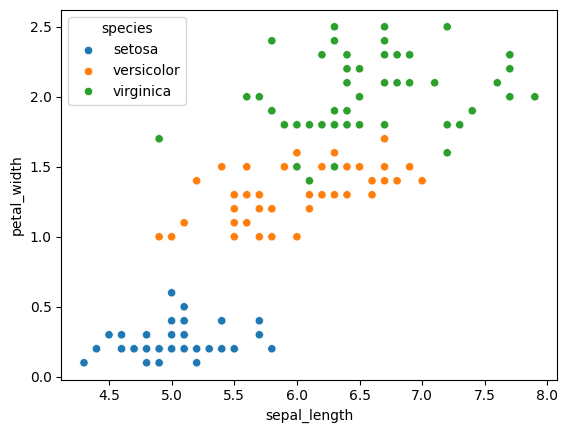

In [49]:
sns.scatterplot(x="sepal_length", y="petal_width", data=iris, hue="species")

# Exercise

## Load data and clean up

In [50]:
exer = sns.load_dataset("exercise")
exer

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


In [51]:
exer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int64   
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     category
 5   kind        90 non-null     category
dtypes: category(3), int64(3)
memory usage: 2.9 KB


In [52]:
exer.describe()

,Unnamed: 0,id,pulse
count,90.000000,90.000000,90.000000
mean,44.500000,15.500000,99.700000
std,26.124701,8.703932,14.858471
min,0.000000,1.000000,80.000000
25%,22.250000,8.000000,90.250000
50%,44.500000,15.500000,96.000000
75%,66.750000,23.000000,103.000000
max,89.000000,30.000000,150.000000


In [53]:
exer.drop("Unnamed: 0", axis=1)

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest
...,...,...,...,...,...
85,29,no fat,135,15 min,running
86,29,no fat,130,30 min,running
87,30,no fat,99,1 min,running
88,30,no fat,111,15 min,running


In [54]:
exer = exer.iloc[:, 1:]
exer

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest
...,...,...,...,...,...
85,29,no fat,135,15 min,running
86,29,no fat,130,30 min,running
87,30,no fat,99,1 min,running
88,30,no fat,111,15 min,running


In [55]:
exer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      90 non-null     int64   
 1   diet    90 non-null     category
 2   pulse   90 non-null     int64   
 3   time    90 non-null     category
 4   kind    90 non-null     category
dtypes: category(3), int64(2)
memory usage: 2.2 KB


In [56]:
exer["id"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [57]:
exer.describe()

,id,pulse
count,90.000000,90.000000
mean,15.500000,99.700000
std,8.703932,14.858471
min,1.000000,80.000000
25%,8.000000,90.250000
50%,15.500000,96.000000
75%,23.000000,103.000000
max,30.000000,150.000000


In [58]:
print(exer["kind"].unique())
print("")
print(exer["time"].unique())
print("")
print(exer["diet"].unique())

['rest', 'walking', 'running']
Categories (3, object): ['rest', 'walking', 'running']

['1 min', '15 min', '30 min']
Categories (3, object): ['1 min', '15 min', '30 min']

['low fat', 'no fat']
Categories (2, object): ['no fat', 'low fat']


In [59]:
exer.value_counts().to_frame()

count
id diet    pulse time   kind          
1  low fat 85    1 min  rest         1
23 low fat 99    30 min running      1
22 low fat 112   30 min running      1
           104   15 min running      1
           98    1 min  running      1
...                                ...
10 no fat  100   1 min  rest         1
           97    15 min rest         1
9  no fat  99    15 min rest         1
           97    1 min  rest         1
30 no fat  150   30 min running      1

[90 rows x 1 columns]

In [60]:
exer[["pulse", "kind"]].groupby("kind").mean()

/var/folders/0s/p6r6pj_15m5cg5q_gj8_xdjm0000gn/T/ipykernel_96653/4215160937.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exer[["pulse", "kind"]].groupby("kind").mean()


,pulse
kind,
rest,90.833333
walking,95.200000
running,113.066667


In [61]:
exer[["pulse", "kind", "diet"]].groupby(["kind", "diet"]).mean()

/var/folders/0s/p6r6pj_15m5cg5q_gj8_xdjm0000gn/T/ipykernel_96653/3033059270.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exer[["pulse", "kind", "diet"]].groupby(["kind", "diet"]).mean()


pulse
kind    diet               
rest    no fat    92.333333
        low fat   89.333333
walking no fat    96.933333
        low fat   93.466667
running no fat   121.066667
        low fat  105.066667

In [62]:
exer[["pulse", "kind", "diet"]].groupby(["kind", "diet"]).mean().unstack()

/var/folders/0s/p6r6pj_15m5cg5q_gj8_xdjm0000gn/T/ipykernel_96653/267290537.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exer[["pulse", "kind", "diet"]].groupby(["kind", "diet"]).mean().unstack()


pulse            
diet         no fat     low fat
kind                           
rest      92.333333   89.333333
walking   96.933333   93.466667
running  121.066667  105.066667

<Axes: xlabel='pulse', ylabel='Count'>

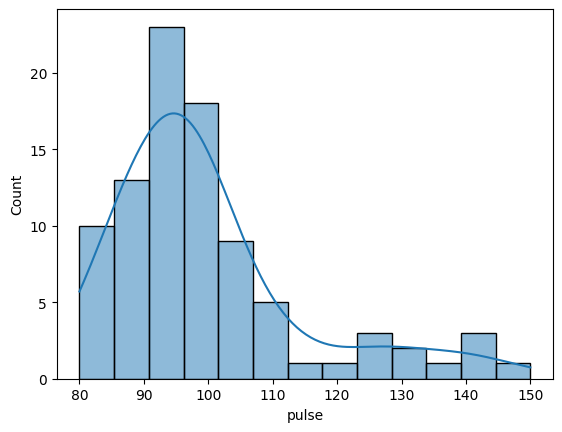

In [63]:
sns.histplot(exer["pulse"], kde=True)

In [64]:
sns.histplot(exer[["pulse", "time"]], hue="time")

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Axes: xlabel='kind', ylabel='pulse'>

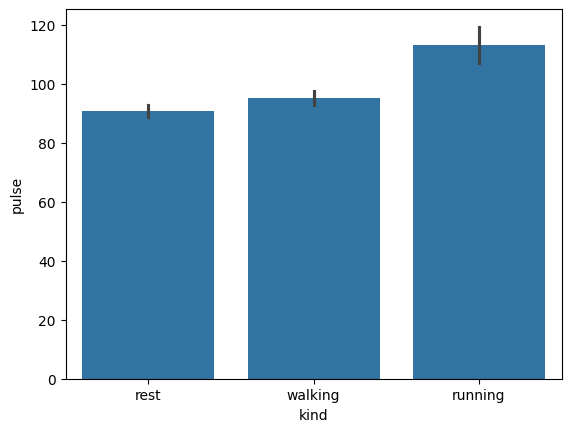

In [ ]:
sns.barplot(x="kind", y="pulse", data=exer)

<Axes: xlabel='kind', ylabel='pulse'>

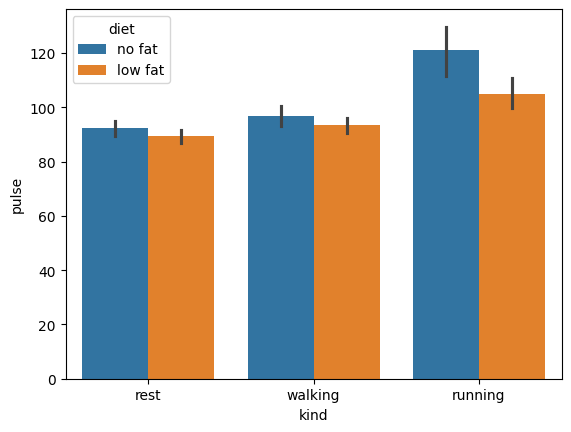

In [ ]:
sns.barplot(x="kind", y="pulse", data=exer, hue="diet")

<Axes: xlabel='diet', ylabel='pulse'>

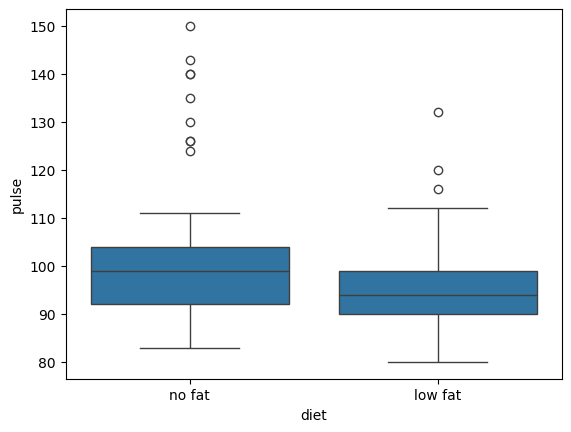

In [ ]:
sns.boxplot(y="pulse", x="diet", data=exer)

In [ ]:
exer

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest
...,...,...,...,...,...
85,29,no fat,135,15 min,running
86,29,no fat,130,30 min,running
87,30,no fat,99,1 min,running
88,30,no fat,111,15 min,running


<Axes: xlabel='time', ylabel='pulse'>

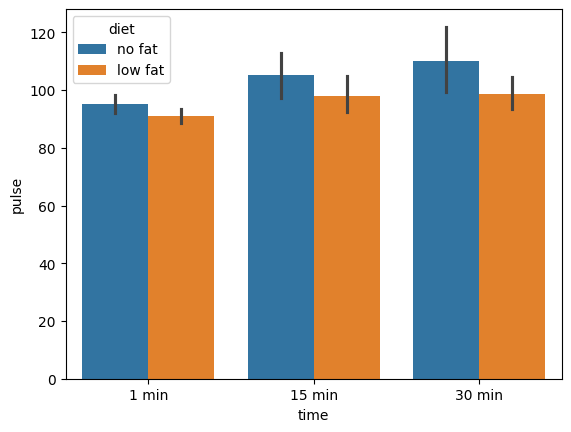

In [ ]:
sns.barplot(y="pulse", x="time", data=exer, hue="diet")

<Axes: xlabel='time', ylabel='pulse'>

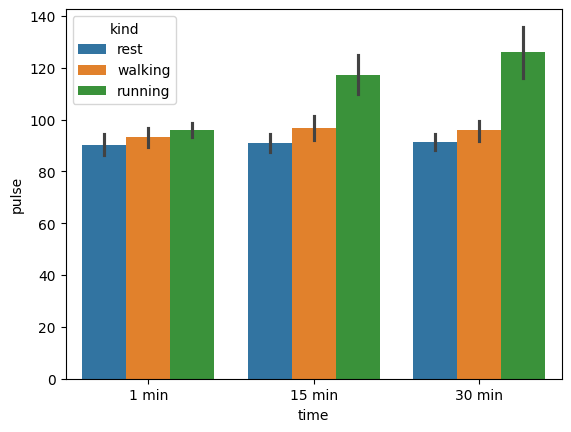

In [ ]:
sns.barplot(y="pulse", x="time", data=exer, hue="kind")

In [ ]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<Axes: xlabel='day', ylabel='total_bill'>

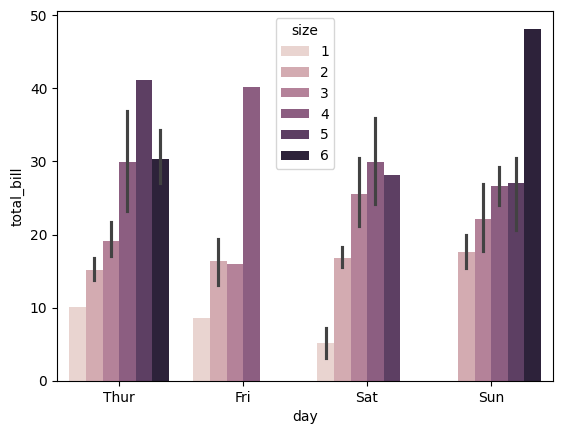

In [ ]:
sns.barplot(data=df, x="day", y="total_bill", hue="size")

In [ ]:
df[["size", "sex", "total_bill"]].groupby(["size", "sex"]).mean().unstack()

/var/folders/0s/p6r6pj_15m5cg5q_gj8_xdjm0000gn/T/ipykernel_29822/25180410.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[["size", "sex", "total_bill"]].groupby(["size", "sex"]).mean().unstack()


total_bill           
sex        Male     Female
size                      
1      8.580000   6.796667
2     17.104082  15.339483
3     24.287083  21.547143
4     28.078214  30.278889
5     30.122500  29.850000
6     41.235000  28.425000

<Axes: >

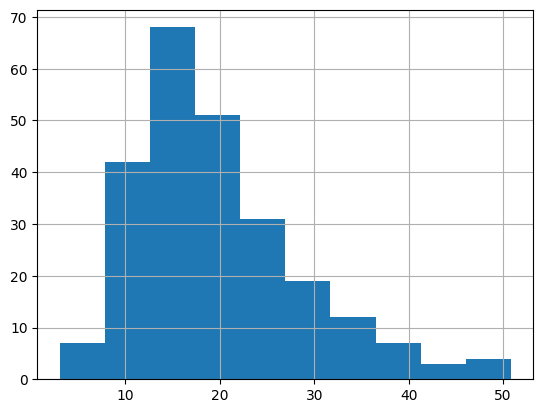

In [ ]:
df["total_bill"].hist()

<Axes: xlabel='total_bill', ylabel='Count'>

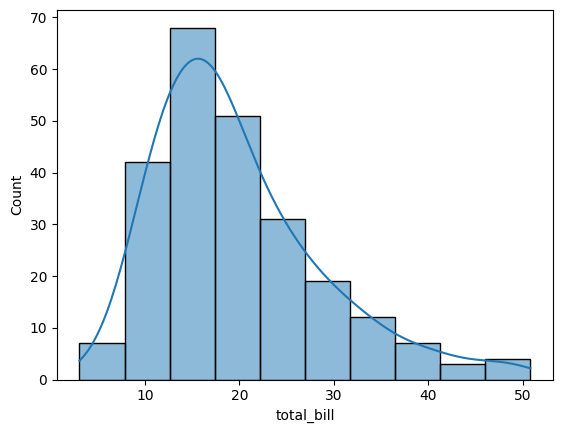

In [ ]:
sns.histplot(data=df, x="total_bill", bins=10, kde=True)

<Axes: ylabel='tip'>

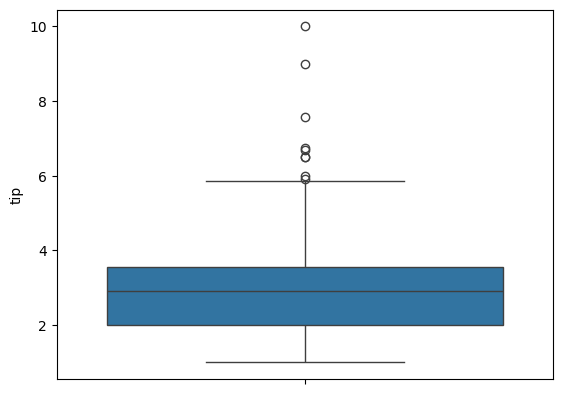

In [ ]:
sns.boxplot(data=df["tip"])

In [ ]:
df["bill_per_person"] = (df["total_bill"] / df["size"]).round(2)
df

,total_bill,tip,sex,smoker,day,time,size,bill_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91


<Axes: xlabel='sex', ylabel='bill_per_person'>

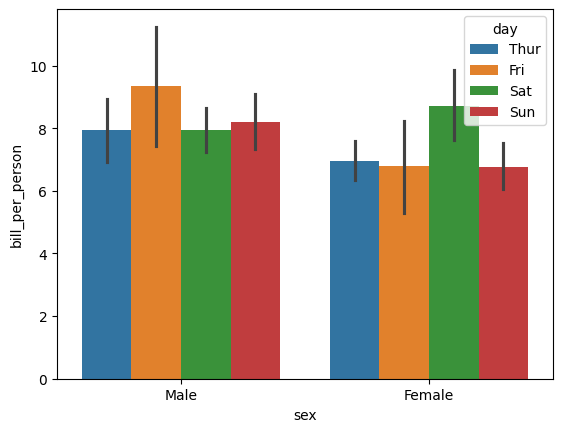

In [ ]:
sns.barplot(data=df, x="sex", y="bill_per_person", hue="day")

<Axes: xlabel='smoker', ylabel='bill_per_person'>

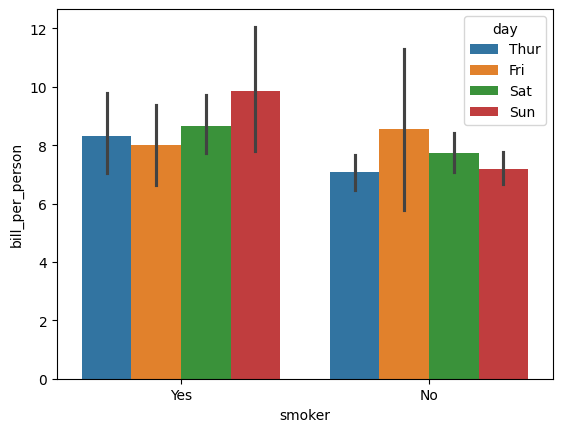

In [ ]:
sns.barplot(data=df, x="smoker", y="bill_per_person", hue="day")

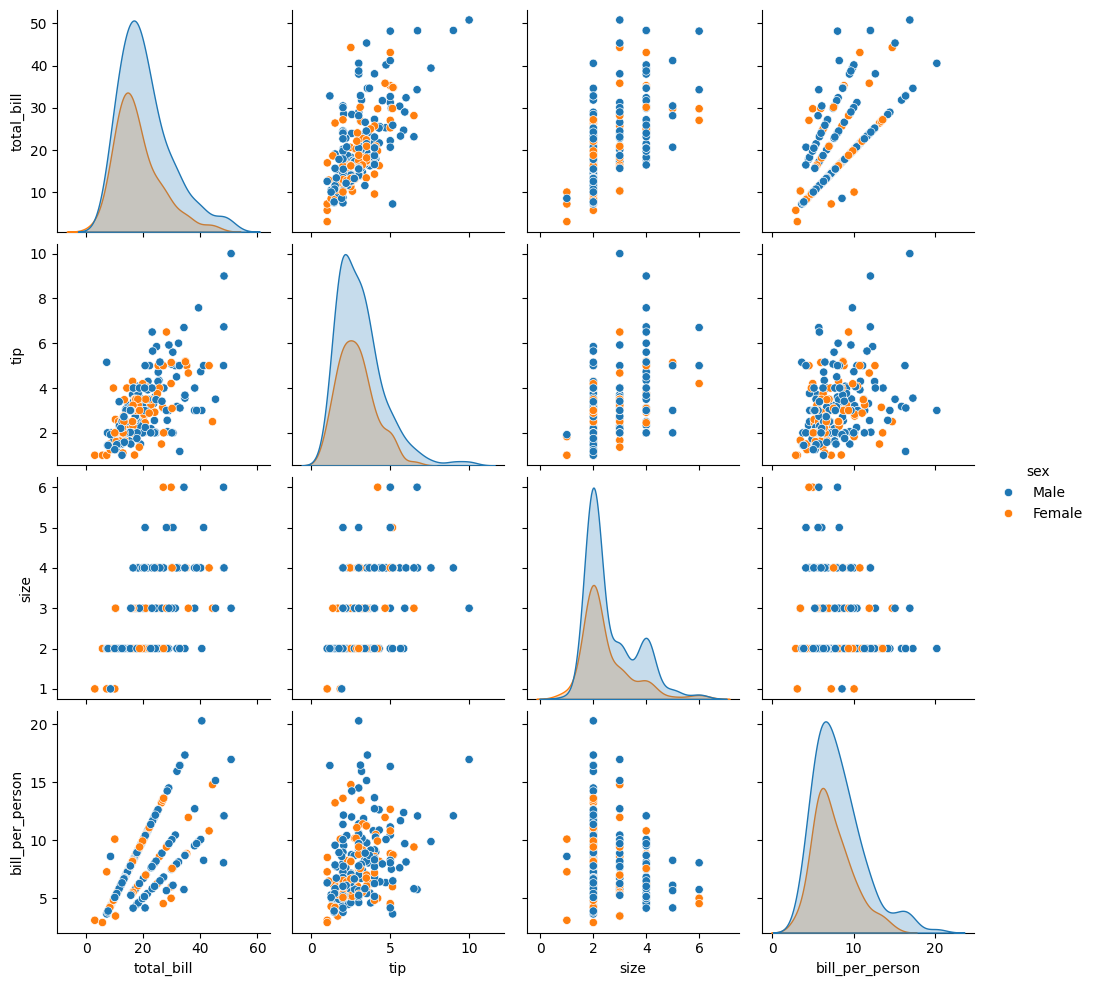

In [ ]:
sns.pairplot(df, hue="sex")

<Axes: xlabel='bill_per_person', ylabel='Count'>

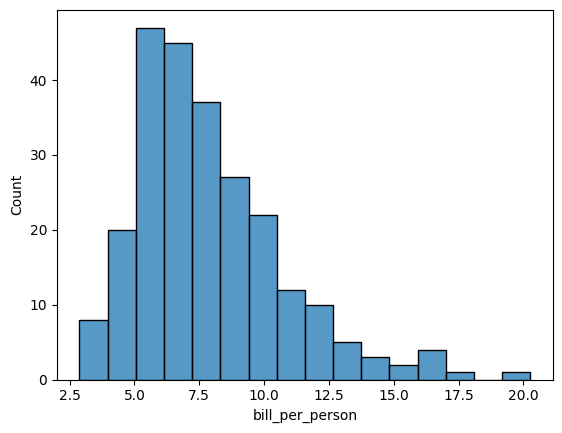

In [ ]:
sns.histplot(data=df, x="bill_per_person")

<Axes: xlabel='day', ylabel='total_bill'>

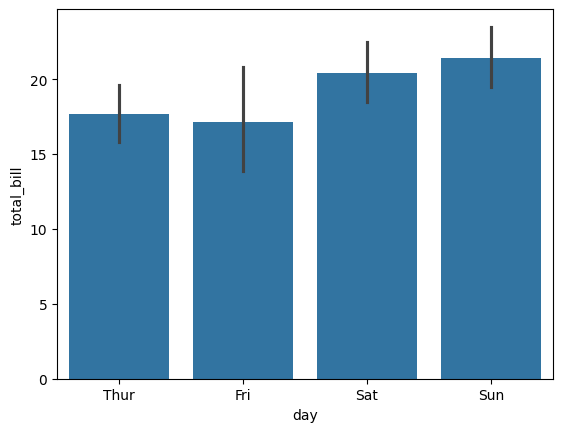

In [ ]:
sns.barplot(x="day", y="total_bill", data=df)

In [ ]:
tita = sns.load_dataset("titanic").dropna()
tita

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [ ]:
tita.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [ ]:
tita.describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [ ]:
tita = tita.drop("survived", axis=1)
tita

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [ ]:
sr = tita["survived"].map(lambda x: "yes" if x == 1 else "no")
sr

1      yes
3      yes
6       no
10     yes
11     yes
      ... 
871    yes
872     no
879    yes
887    yes
889    yes
Name: survived, Length: 182, dtype: object

In [ ]:
for i in range(len(sr.values)):
    if sr.values[i] != tita.iloc[i, -2]:
        print(tita.iloc[i, -2])
